## ESPERANTO - Machine Learning Project

TEAM: Karolina Wojciechowska, Justyna Krygier, Karol Mularski, Łukasz Rosenkiewicz

DATASET: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

![uci](refs/UCI.jpg)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

# Dataset Features

![summary](refs/summary.png)

In [82]:
dataset = pd.read_csv('Concrete_Data.csv',quotechar='"', decimal=',', skipinitialspace=True)
columns_to_model = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                    'Coarse Aggregate', 'Fine Aggregate', 'Age']

X = dataset[columns_to_model]
y = dataset['Concrete compressive strength']

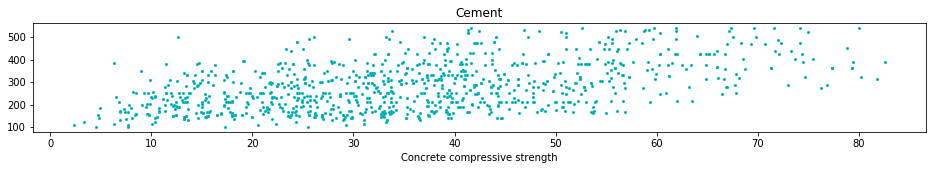

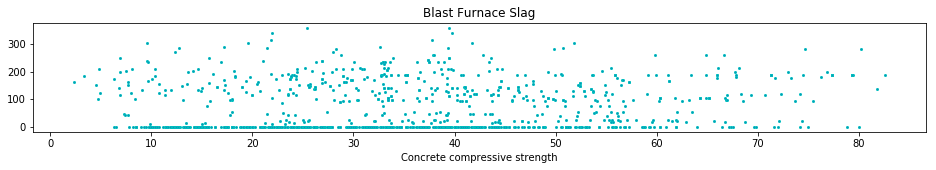

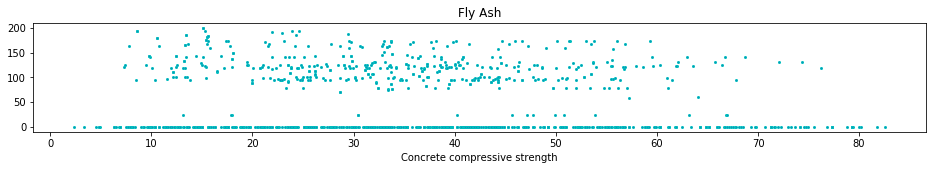

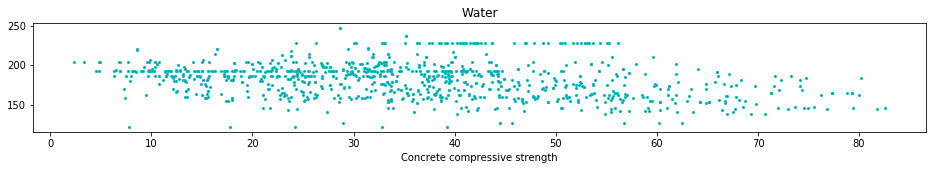

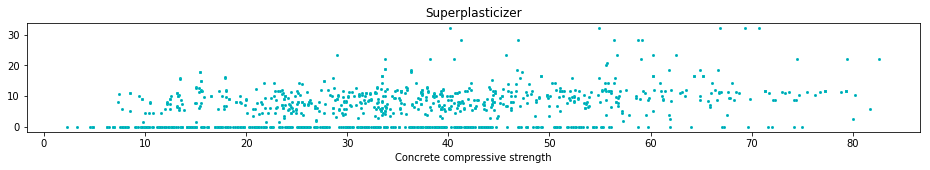

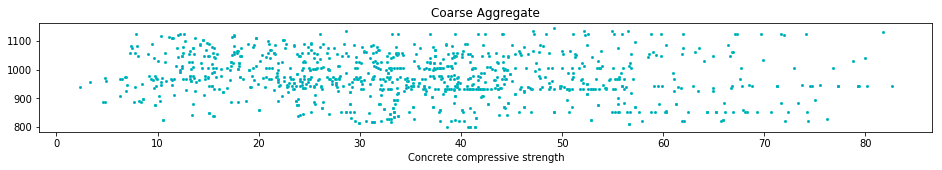

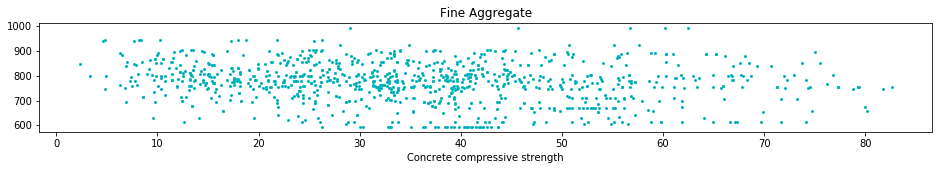

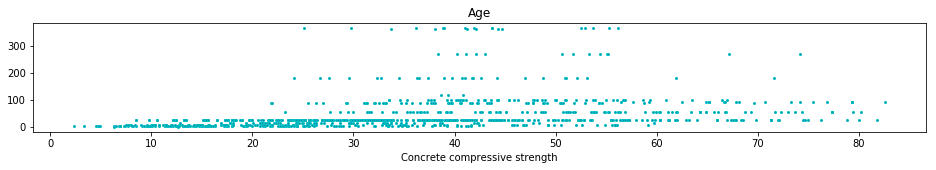

In [83]:
for i in columns_to_model:
    fig = plt.figure(figsize=plt.figaspect(0.1))
    plt.scatter(y, X[i], cmap=plt.cm.Set1, edgecolor='c', s=4, label=i)
    plt.title(i)
    plt.xlabel('Concrete compressive strength')
    plt.show()

## Split the dataset - 75 % - 25%

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=101)

## Create Mean Absolute Percentage Error function

In [85]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

## Regression Models

In [86]:
## LINEAR REGRESSION
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)
y_pred_lin = regr.predict(X_test)

## XGBoost
clf_xgbr = XGBRegressor()
clf_xgbr.fit(X_train, y_train, verbose=False)
y_pred_xgb = clf_xgbr.predict(X_test)

## SVR - 2 kernels
svr_lin = svm.SVR(kernel='linear')
svr_lin.fit(X_train, y_train)
y_pred_svrlin = svr_lin.predict(X_test)

svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_svrrbf = svr_rbf.predict(X_test)

## DECISION TREE
for max_features in [1,2,3,4,5,6,7,8]:
    dtree = DecisionTreeRegressor(max_features=max_features, random_state=None, max_depth=None,
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
    dtree.fit(X_train, y_train)
    y_pred_tree = dtree.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred_tree)
    r2 = metrics.r2_score(y_test, y_pred_tree)
 #   print('For max features: {}    Mean Absolute Error:  {}    R^2:  {}'.format(max_features, np.around(mae,decimals=4),r2))


### Prediction Results

In [89]:
print('R^2_RL       :  ', metrics.r2_score(y_test, y_pred_lin))
print('R^2_XGb      :  ', metrics.r2_score(y_test, y_pred_xgb))
print('R^2_SVRLin   :  ', metrics.r2_score(y_test, y_pred_svrlin))
print('R^2_SVRrbf   :  ', metrics.r2_score(y_test, y_pred_svrrbf))
print('R^2_DTree    :  ', metrics.r2_score(y_test, y_pred_tree))
print()
print('Mean Absolute Error_RL       :  ', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Mean Absolute Error_XGb      :  ', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('Mean Absolute Error_SVRlin   :  ', metrics.mean_absolute_error(y_test, y_pred_svrlin))
print('Mean Absolute Error_SVRrbf   :  ', metrics.mean_absolute_error(y_test, y_pred_svrrbf))
print('Mean Absolute Error_DTree    :  ', metrics.mean_absolute_error(y_test, y_pred_tree))
print()
print('Mean Absolute % Error_RL     :  ', mean_absolute_percentage_error(y_test, y_pred_lin))
print('Mean Absolute % Error_XGb    :  ', mean_absolute_percentage_error(y_test, y_pred_xgb))
print('Mean Absolute % Error_SVRlin :  ', mean_absolute_percentage_error(y_test, y_pred_svrlin))
print('Mean Absolute % Error_SVRrbf :  ', mean_absolute_percentage_error(y_test, y_pred_svrrbf))
print('Mean Absolute % Error_DTree  :  ', mean_absolute_percentage_error(y_test, y_pred_tree))

R^2_RL       :   0.6101732771570201
R^2_XGb      :   0.9063913725938589
R^2_SVRLin   :   0.5161990265446725
R^2_SVRrbf   :   0.292472290460113
R^2_DTree    :   0.8313734115954916

Mean Absolute Error_RL       :   8.655951386743029
Mean Absolute Error_XGb      :   3.9290020516861315
Mean Absolute Error_SVRlin   :   8.689916245057379
Mean Absolute Error_SVRrbf   :   10.977198973850978
Mean Absolute Error_DTree    :   4.592073643410854

Mean Absolute % Error_RL     :   31.73687243052431
Mean Absolute % Error_XGb    :   12.633529968384455
Mean Absolute % Error_SVRlin :   30.762259295344997
Mean Absolute % Error_SVRrbf :   47.1005207910189
Mean Absolute % Error_DTree  :   14.855527033734436


## Cross validation

### Parameters

In [90]:
kfold = KFold(n_splits=20, random_state=11)

scorer_MAE = make_scorer(mean_absolute_error)
scorer_MAPE = make_scorer(mean_absolute_percentage_error)

### Cross Validation Results

##### --- Mean Absolute Error ---

In [91]:
# results_MAE_regr   = cross_val_score(regr, X_train, y_train, cv=kfold, scoring=scorer_MAE)
# results_MAE_XGb    = cross_val_score(clf_xgbr, X_train, y_train, cv=kfold, scoring=scorer_MAE)
# results_MAE_SVRlin = cross_val_score(svr_lin, X_train, y_train, cv=kfold, scoring=scorer_MAE)
# results_MAE_SVRrbf = cross_val_score(svr_rbf, X_train, y_train, cv=kfold, scoring=scorer_MAE)
# results_MAE_DTree  = cross_val_score(dtree, X_train, y_train, cv=kfold, scoring=scorer_MAE)

In [92]:
# print('Mean_MAE_RL     : {}'.format(results_MAE_regr.mean()))
# print('Mean_MAE_XGb    : {}'.format(results_MAE_XGb.mean()))
# print('Mean_MAE_SVRlin : {}'.format(results_MAE_SVRlin.mean()))
# print('Mean_MAE_SVRrbf : {}'.format(results_MAE_SVRrbf.mean()))
# print('Mean_MAE_DTree  : {}'.format(results_MAE_DTree.mean()))

![cross_val_mae](refs/cross_val_mae.png)

##### --- Mean Absolute Percentage Error ---

In [93]:
# results_MAPE_regr = cross_val_score(regr, X_train, y_train, cv=kfold, scoring=scorer_MAPE)
# results_MAPE_XGb = cross_val_score(clf_xgbr, X_train, y_train, cv=kfold, scoring=scorer_MAPE)
# results_MAPE_SVRlin = cross_val_score(svr_lin, X_train, y_train, cv=kfold, scoring=scorer_MAPE)
# results_MAPE_SVRrbf = cross_val_score(svr_rbf, X_train, y_train, cv=kfold, scoring=scorer_MAPE)
# results_MAPE_DTree = cross_val_score(dtree, X_train, y_train, cv=kfold, scoring=scorer_MAPE)

In [94]:
# print('Mean_MAPE_RL     : {}'.format(results_MAPE_regr.mean()))
# print('Mean_MAPE_XGb    : {}'.format(results_MAPE_XGb.mean()))
# print('Mean_MAPE_SVRlin : {}'.format(results_MAPE_SVRlin.mean()))
# print('Mean_MAPE_SVRrbf : {}'.format(results_MAPE_SVRrbf.mean()))
# print('Mean_MAPE_DTree  : {}'.format(results_MAPE_DTree.mean()))

![cross_val_mape](refs/cross_val_mape.png)

In [95]:
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pickle


def main():
    pd.set_option('display.max_columns', 10)
    df = pd.read_csv('Concrete_Corr', decimal='.', skipinitialspace=True)

    columns_to_model = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                        'Coarse Aggregate', 'Fine Aggregate', 'Age']

    for row in df.itertuples():
        c = math.floor(row._10 / 5)
        df.at[row.Index, 'Concrete compressive strength'] = c * 5
    df['Concrete compressive strength'] = df['Concrete compressive strength'].astype(str)

    for row in df.itertuples():
        df.at[row.Index, 'Concrete compressive strength'] = 'M' + df.at[row.Index, 'Concrete compressive strength']

    dataset = df[columns_to_model]
    y = df['Concrete compressive strength']
    dataset['Class'] = y
    
    dataset.to_csv('classification_dataset', index=False)
    
    print(dataset)
    
if __name__ == '__main__':
    main()   
    
main()

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
5      266.0               114.0      0.0  228.0               0.0   
6      380.0                95.0      0.0  228.0               0.0   
7      380.0                95.0      0.0  228.0               0.0   
8      266.0               114.0      0.0  228.0               0.0   
9      475.0                 0.0      0.0  228.0               0.0   
10     198.6               132.4      0.0  192.0               0.0   
11     198.6               132.4      0.0  192.0               0.0   
12     427.5                47.5      0.0  228.0               0.0   
13     190.0        

In [96]:
dataset = pd.read_csv('classification_dataset')
columns_to_model = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                    'Coarse Aggregate', 'Fine Aggregate', 'Age']
X = dataset[columns_to_model]
y = dataset['Class']
print(dataset['Class'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, random_state=11)

M35.0    128
M30.0    125
M40.0    109
M25.0    103
M20.0     98
M15.0     80
M10.0     77
M50.0     63
M45.0     60
M55.0     53
M5.0      34
M60.0     30
M65.0     28
M70.0     19
M75.0     14
M0.0       6
M80.0      3
Name: Class, dtype: int64


### Classifier Model

In [98]:
clf_RF = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=0, min_samples_leaf=2, criterion="gini")
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
score_RF = accuracy_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
cf_RF = confusion_matrix(y_test, y_pred_RF)

clf_DTC = DecisionTreeClassifier(random_state=0)
clf_DTC.fit(X_train, y_train)
y_pred_DTC = clf_DTC.predict(X_test)
score_DTC = accuracy_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC, average='weighted')
cf_DTC = confusion_matrix(y_test, y_pred_DTC)

clf_SVCrbf = svm.SVC(kernel='rbf')
clf_SVCrbf.fit(X_train, y_train)
y_pred_SVCrbf = clf_SVCrbf.predict(X_test)
score_SVCrbf = accuracy_score(y_test, y_pred_SVCrbf)
f1_SVCrbf = f1_score(y_test, y_pred_SVCrbf, average='weighted')
cf_SVCrbf = confusion_matrix(y_test, y_pred_SVCrbf)

clf_Gaus = GaussianNB()
clf_Gaus.fit(X_train, y_train)
y_pred_Gaus = clf_Gaus.predict(X_test)
score_Gaus = accuracy_score(y_test, y_pred_Gaus)
f1_Gaus = f1_score(y_test, y_pred_Gaus, average='weighted')
cf_Gaus = confusion_matrix(y_test, y_pred_Gaus)

clf_KNC = KNeighborsClassifier()
clf_KNC.fit(X_train, y_train)
y_pred_KNC = clf_KNC.predict(X_test)
score_KNC = accuracy_score(y_test, y_pred_KNC)
f1_KNC = f1_score(y_test, y_pred_KNC, average='weighted')
cf_KNC = confusion_matrix(y_test, y_pred_KNC)

print('Accuracy_RandomForest           :', score_RF)
print('Accuracy_DecisionTreeClassifier :', score_DTC)
print('Accuracy_SVCrbf                 :', score_SVCrbf)
print('Accuracy_GaussianNB             :', score_Gaus)
print('Accuracy_KNeighborsClassifier   :', score_KNC)
print()
print('F1_RandomForest           :', f1_RF)
print('F1_DecisionTreeClassifier :', f1_DTC)
print('F1_SVCrbf                 :', f1_SVCrbf)
print('F1_GaussianNB             :', f1_Gaus)
print('F1_KNeighborsClassifier   :', f1_KNC)
print()
print('F1_RandomForest :\n', cf_RF)
print('F1_DecisionTreeClassifier :\n', cf_DTC)
print('F1_SVCrbf :\n', cf_SVCrbf)
print('F1_GaussianNB :\n', cf_Gaus)
print('F1_KNeighborsClassifier :\n', cf_KNC)

Accuracy_RandomForest           : 0.40310077519379844
Accuracy_DecisionTreeClassifier : 0.437984496124031
Accuracy_SVCrbf                 : 0.3023255813953488
Accuracy_GaussianNB             : 0.18992248062015504
Accuracy_KNeighborsClassifier   : 0.2441860465116279

F1_RandomForest           : 0.3913992291990386
F1_DecisionTreeClassifier : 0.4337818272129148
F1_SVCrbf                 : 0.3196932458593913
F1_GaussianNB             : 0.17371437741664536
F1_KNeighborsClassifier   : 0.2364169092098443

F1_RandomForest :
 [[ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 1 17  2  0  1  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  5  8  5  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4 10  9  3  3  0  0  0  0  0  0  0  0  0]
 [ 0  2  1  4 10  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  5 15  8  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 15  3  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6 10  9  3  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  1  5  2  1  0  1  0  1  0  0  0]
 [ 0 10  1  0  0  